In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from array import array
import os
import sys
import ROOT
from ROOT import TVectorD, TMatrix, TMath, TVector3, TGraphErrors, TFile, TTree, gRandom, gPad, gROOT, gVirtualX, kTRUE, kRed, TProfile, gStyle,  TFile, gSystem
import sys 
import os
sys.path.append(os.path.abspath("/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/fastMCKalman/MC/"))
from fastSimulation import *

Welcome to JupyROOT 6.26/06


# Reading the files

In [3]:
folder="/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/"
inputData = folder+"fastParticle.list"
ROOT.initTreeFast(inputData)
tree=ROOT.treeFast
treeSeed = ROOT.treeSeed

tree.SetAlias("yend","part.fParamMC[fParamMC@.size()-1].fX*sin(part.fParamMC[fParamMC@.size()-1].fAlpha)+part.fParamMC[fParamMC@.size()-1].fP[0]*cos(part.fParamMC[fParamMC@.size()-1].fAlpha)")
tree.SetAlias("ystart","part.fParamMC[0].fX*sin(part.fParamMC[0].fAlpha)+part.fParamMC[0].fP[0]*cos(part.fParamMC[0].fAlpha)")
tree.SetAlias("xend","part.fParamMC[fParamMC@.size()-1].fX*cos(part.fParamMC[fParamMC@.size()-1].fAlpha)-part.fParamMC[fParamMC@.size()-1].fP[0]*sin(part.fParamMC[fParamMC@.size()-1].fAlpha)")
tree.SetAlias("xstart","part.fParamMC[0].fX*cos(part.fParamMC[0].fAlpha)-part.fParamMC[0].fP[0]*sin(part.fParamMC[0].fAlpha)")
tree.SetAlias("lArmMC","sqrt((xend-xstart)*(xend-xstart)+(yend-ystart)*(yend-ystart))")

True

Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/FullRecoInteraction.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/FullRecoInteraction.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/FullRecoInteraction.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/FullRecoInteraction.root


In [4]:
tree.SetAlias("gxMC","part.fParamMC[].fX*cos(part.fParamMC[].fAlpha)-part.fParamMC[].fP[0]*sin(part.fParamMC[].fAlpha)")
tree.SetAlias("gyMC","part.fParamMC[].fX*sin(part.fParamMC[].fAlpha)+part.fParamMC[].fP[0]*cos(part.fParamMC[].fAlpha)")
tree.SetAlias("gxMC0","part.fParamMC[0].fX*cos(part.fParamMC[0].fAlpha)-part.fParamMC[0].fP[0]*sin(part.fParamMC[0].fAlpha)")
tree.SetAlias("gyMC0","part.fParamMC[0].fX*sin(part.fParamMC[0].fAlpha)+part.fParamMC[0].fP[0]*cos(part.fParamMC[0].fAlpha)")
tree.SetAlias("ResALICE","(fParamMC[0].GetP()-fParamInRot[0].GetP())/fParamMC[0].GetP()")
tree.SetAlias("ResGAr","(fParamMC[0].GetP()-paramSt.GetP())/fParamMC[0].GetP()")
tree.Draw(">>elist","part.fParamMC@.size()<50 && abs(ResALICE)/abs(ResGAr)<2","entrylist")
#tree.Draw(">>elist","lArmMC<75 && fParamMC@.size()>300","entrylist")
elist = ROOT.gDirectory.Get("elist")
tree.SetEntryList(elist)

Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/ConvertMC/FullRecoInteraction/Plots/ZY.png has been created


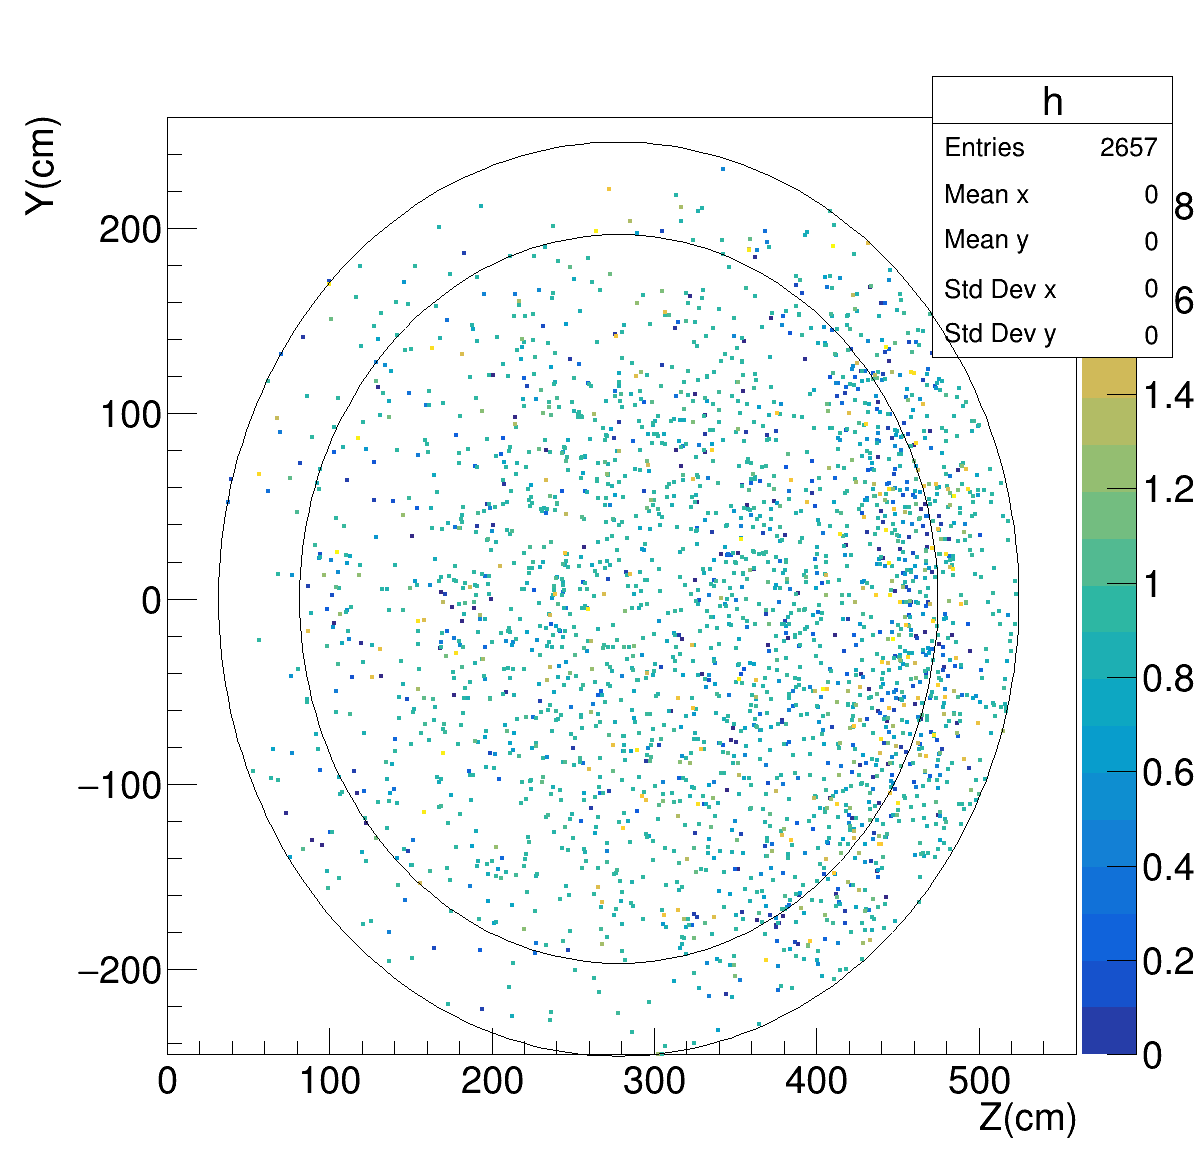

In [5]:
hqp = ROOT.TCanvas("hqp","hqp",1200,1200)
tree.Draw("gyMC0:gxMC0:abs(ResALICE)/abs(ResGAr)>>h(1500,0,556,1500,-278,278)","","colz")
h = ROOT.gPad.GetPrimitive("h")
h.SetTitle(";Z(cm);Y(cm)")
hqp.SetLeftMargin(0.14)
hqp.SetRightMargin(0.1)
el1 = ROOT.TEllipse(278,0.,196.6,196.6)
el1.SetFillStyle(0)
el1.Draw("same")
eltot = ROOT.TEllipse(278,0.,246.6,246.6)
eltot.SetFillStyle(0)
eltot.Draw("same")
hqp.Draw()
hqp.SaveAs(folder+"Plots/ZY.png")

In [5]:
hqp = ROOT.TCanvas("hqp","hqp",800,800)
tree.Draw("part.fParamMC[].fP[0]:part.fParamMC[].fP[1]>>h2(1000,-500,500,1000,-278,278)","part.fParamMC[].fAlpha==0","",100,0)
h = ROOT.gPad.GetPrimitive("h2")
h.SetTitle(";X(cm);Y(cm)")
hqp.SetLeftMargin(0.14)
hqp.SetRightMargin(0.1)
elz1 = ROOT.TBox(-219.7,-200,219.7,200)
elz1.SetFillStyle(0)
elz1.Draw("same")
elztot = ROOT.TBox(-249.7,-246.6,249.7,246.6)
elztot.SetFillStyle(0)
elztot.Draw("same")
hqp.Draw()
hqp.SaveAs(folder+"Plots/XY.png")

AttributeError: 'TObject' object has no attribute 'SetTitle'

Warning in <TCanvas::Constructor>: Deleting canvas with same name: hqp


## Residual maps


****************************************
Minimizer is Linear / Migrad
Chi2                      =      87.7552
NDf                       =           27
p0                        =     0.341842   +/-   0.00557194  
p1                        =   0.00103551   +/-   0.00023542  
p2                        = -6.17751e-06   +/-   2.29134e-06 

****************************************
Minimizer is Linear / Migrad
Chi2                      =      54.7077
NDf                       =           15
p0                        =     0.770275   +/-   0.0666426   
p1                        =  -0.00820538   +/-   0.00123618  
p2                        =  3.92843e-05   +/-   5.67711e-06 

****************************************
Minimizer is Linear / Migrad
Chi2                      =       278.85
NDf                       =           43
p0                        =      0.38058   +/-   0.0224305   
p1                        =  -0.00091089   +/-   0.000243642 
p2                        =  3.82028e-06   +/

Warning in <TCanvas::Constructor>: Deleting canvas with same name: hqpr
Info in <TH2F::DoFitSlices>: Slice fit 0 (7.600000,10.000000)
Info in <TH2F::DoFitSlices>: Slice fit 1 (10.000000,12.400000)
Info in <TH2F::DoFitSlices>: Slice fit 2 (12.400000,14.800000)
Info in <TH2F::DoFitSlices>: Slice fit 3 (14.800000,17.200000)
Info in <TH2F::DoFitSlices>: Slice fit 4 (17.200000,19.600000)
Info in <TH2F::DoFitSlices>: Slice fit 5 (19.600000,22.000000)
Info in <TH2F::DoFitSlices>: Slice fit 6 (22.000000,24.400000)
Info in <TH2F::DoFitSlices>: Slice fit 7 (24.400000,26.800000)
Info in <TH2F::DoFitSlices>: Slice fit 8 (26.800000,29.200000)
Info in <TH2F::DoFitSlices>: Slice fit 9 (29.200000,31.600000)
Info in <TH2F::DoFitSlices>: Slice fit 10 (31.600000,34.000000)
Info in <TH2F::DoFitSlices>: Slice fit 11 (34.000000,36.400000)
Info in <TH2F::DoFitSlices>: Slice fit 12 (36.400000,38.800000)
Info in <TH2F::DoFitSlices>: Slice fit 13 (38.800000,41.200000)
Info in <TH2F::DoFitSlices>: Slice fit 14 (

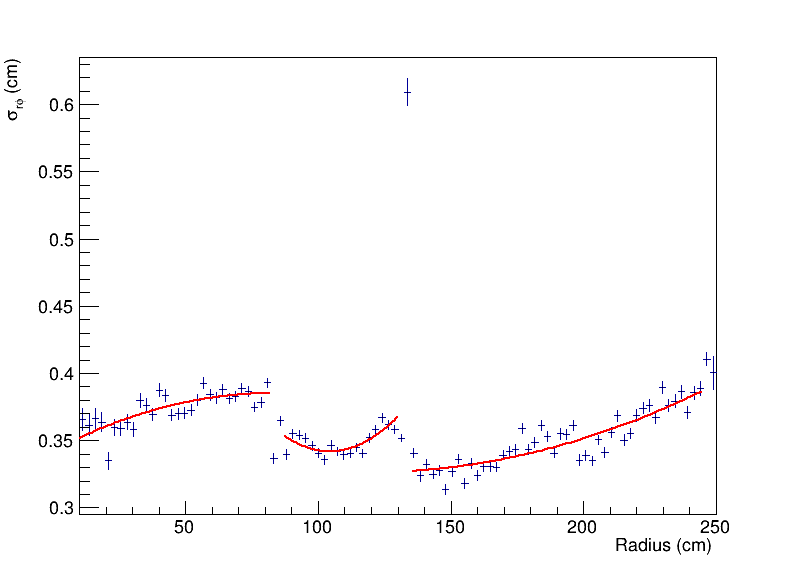

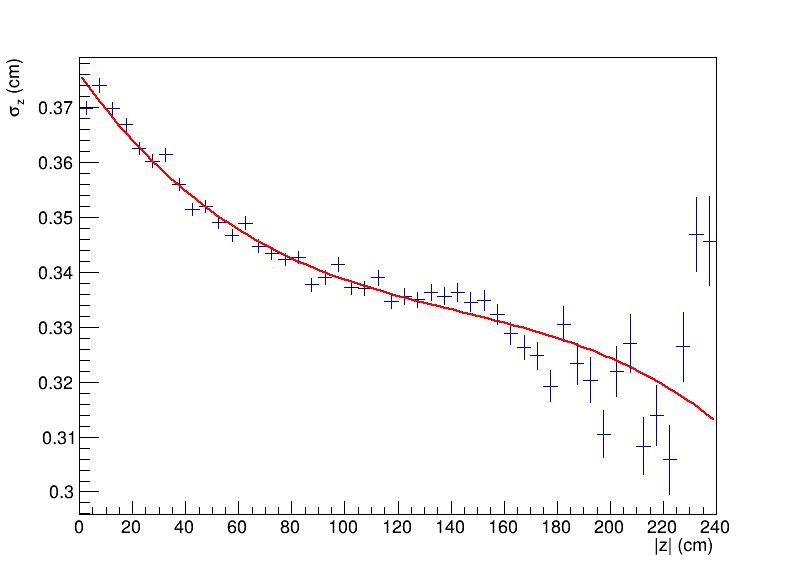

In [ ]:
tree.SetAlias("radiusnosmearMC","sqrt((partnosmear.fParamMC[].fX)*(partnosmear.fParamMC[].fX)+(partnosmear.fParamMC[].fP[0])*(partnosmear.fParamMC[].fP[0]))")
tree.SetAlias("radiusMC","sqrt((part.fParamMC[].fX-278)*(part.fParamMC[].fX-278)+(part.fParamMC[].fP[0])*(part.fParamMC[].fP[0]))")
tree.SetAlias("resRPHI","radiusnosmearMC-radiusMC")
tree.SetAlias("resX","(partnosmear.fParamMC[].fX+278)-part.fParamMC[].fX")
tree.SetAlias("resY","partnosmear.fParamMC[].fP[0]-part.fParamMC[].fP[0]")
tree.SetAlias("resZ","partnosmear.fParamMC[].fP[1]-part.fParamMC[].fP[1]")

gStyle.SetOptStat(0)
hqpr = ROOT.TCanvas("hqpr","hqpr",800,600)
tree.Draw("resRPHI:radiusnosmearMC>>hnewr(100,10,250,400,-10,10)","part.fParamMC[].fAlpha==0&&part.fParamMC[].fP[0]!=0","colz")
hnewr = ROOT.gPad.GetPrimitive("hnewr")
hnewr.FitSlicesY()
hnewr_sigma = ROOT.gDirectory.Get("hnewr_2")
hnewr_sigma.SetTitle(";Radius (cm);#sigma_{r#phi} (cm)")
f0r = ROOT.TF1("f0r","pol2",0,82)
hnewr_sigma.Fit("f0r","0","",0,82)
f1r = ROOT.TF1("f1r","pol2",87,130)
hnewr_sigma.Fit("f1r","0","",87,130)
f2r = ROOT.TF1("f1r","pol2",135,245)
hnewr_sigma.Fit("f1r","0","",135,245)

#tree.Draw("resRPHI:radiusnosmearMC>>h(250,0,250,100,-5,5)","part.fParamMC[].fAlpha==0&&part.fParamMC[].fP[0]!=0","colz")
hnewr_sigma.Draw()
f0r.Draw("same")
f1r.Draw("same")
f2r.Draw("same")
hqpr.Draw()


hqp2 = ROOT.TCanvas("hqp2","hqp2",800,600)
tree.Draw("resZ:abs(partnosmear.fParamMC[].fP[1])>>hnew2(48,0,240,100,-4,4)","part.fParamMC[].fAlpha==0&&part.fParamMC[].fP[0]!=0","colz")
hnew2 = ROOT.gPad.GetPrimitive("hnew2")
hnew2.FitSlicesY()
hnew2_sigma = ROOT.gDirectory.Get("hnew2_2")
hnew2_sigma.SetTitle(";|z| (cm);#sigma_{z} (cm)")
hnew2_sigma.Fit("pol3")
hnew2_sigma.Draw()
#tree.Draw("resZ:abs(partnosmear.fParamMC[].fP[1])>>q(250,0,250,100,-5,5)","part.fParamMC[].fAlpha==0&&part.fParamMC[].fP[0]!=0","colz")
hqp2.Draw()




 FCN=86616.6 FROM MIGRAD    STATUS=CONVERGED     213 CALLS         214 TOTAL
                     EDM=8.26637e-12    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.5 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.22198e-01   1.65343e-04  -9.48606e-08   5.65010e-03
   2  p1           1.98832e-03   1.85739e-04   5.23840e-07   2.81823e-02
   3  p2           4.09547e+04   4.13480e+01   2.10754e-01   1.09830e-08
 FCN=328130 FROM MIGRAD    STATUS=CONVERGED     161 CALLS         162 TOTAL
                     EDM=4.27063e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.2 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.82862e-01   3.95707e-04   7.48132e-08   3.64071e-01
   2  p1           1.49330e-01   7.00610e-04  -4.59021e-07  -2.26677e-01
   3  p2

Warning in <TCanvas::Constructor>: Deleting canvas with same name: hqpr
Warning in <TCanvas::Constructor>: Deleting canvas with same name: hqpr2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: hqpr3


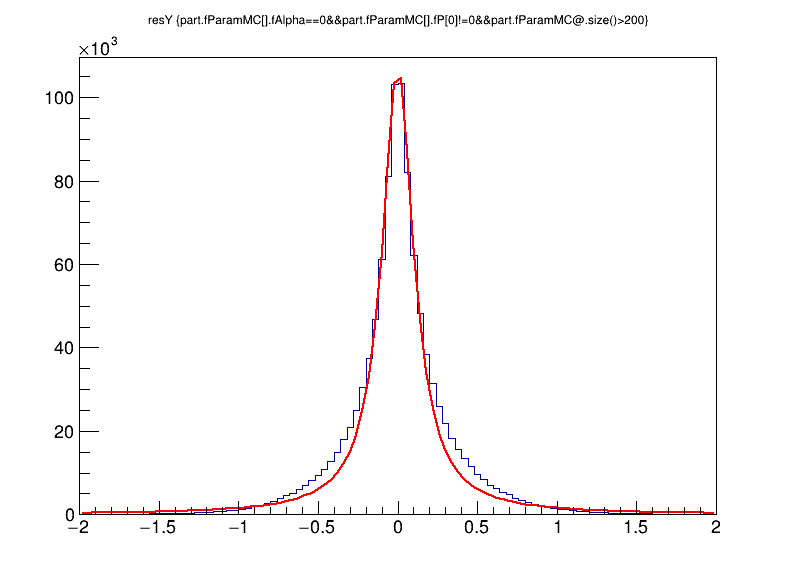

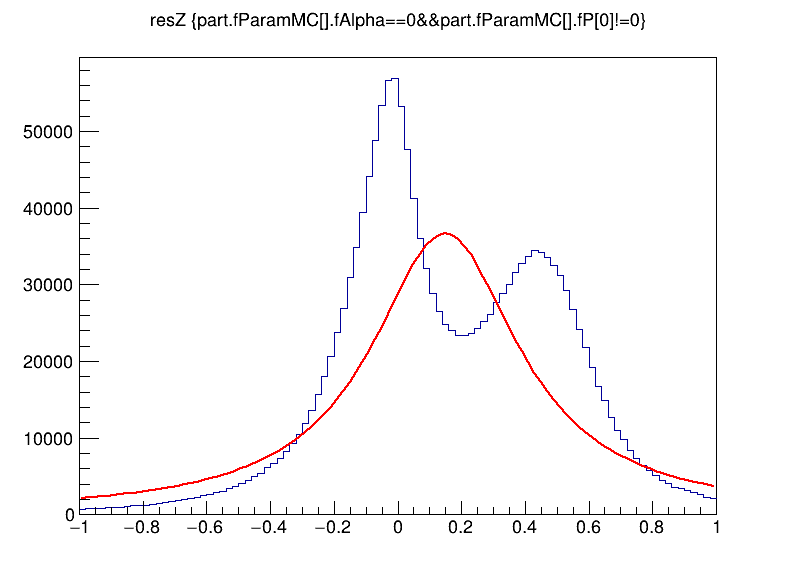

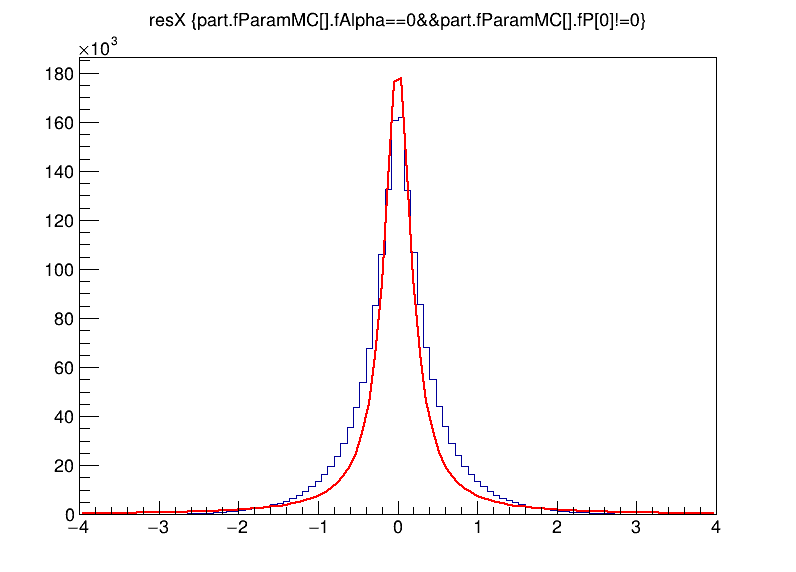

In [ ]:
hqpr = ROOT.TCanvas("hqpr","hqpr",800,600)
tree.Draw("resY>>hnewr(100,-2,2)","part.fParamMC[].fAlpha==0&&part.fParamMC[].fP[0]!=0&&part.fParamMC@.size()>200","")
hnewr = ROOT.gPad.GetPrimitive("hnewr")
func = ROOT.TF1("cauchy","[2]*[0]/(3.14*((x-[1])*(x-[1])+[0]*[0]))",-5,5)
func.SetParameters(10,0,300)
hnewr.Fit("cauchy")
hqpr.Draw()

hqpr2 = ROOT.TCanvas("hqpr2","hqpr2",800,600)
tree.Draw("resZ>>hnewr2(100,-1,1)","part.fParamMC[].fAlpha==0&&part.fParamMC[].fP[0]!=0","")
hnewr2 = ROOT.gPad.GetPrimitive("hnewr2")
func2 = ROOT.TF1("cauchy2","[2]*[0]/(3.14*((x-[1])*(x-[1])+[0]*[0]))",-10,10)
func2.SetParameters(50,0,300)
hnewr2.Fit("cauchy2")
hqpr2.Draw()

hqpr3 = ROOT.TCanvas("hqpr3","hqpr3",800,600)
tree.Draw("resX>>hnewr3(100,-4,4)","part.fParamMC[].fAlpha==0&&part.fParamMC[].fP[0]!=0","")
hnewr3 = ROOT.gPad.GetPrimitive("hnewr3")
func3 = ROOT.TF1("cauchy3","[2]*[0]/(3.14*((x-[1])*(x-[1])+[0]*[0]))",-10,10)
func3.SetParameters(50,0,300)
hnewr3.Fit("cauchy3")
hqpr3.Draw()